## Task # 03 Prediction using Decision Tree Algorithm on Iris dataset

By Resmi Reghukumar

In [5]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [6]:
# Loading dataset
data=pd.read_csv("/home/resmi/Downloads/ML/The Spark Foundation/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# checking for null values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# checking data types of each column
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
# checking basic statistical details
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# removes unwanted column:Id
data=data.drop(['Id'],axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# checking the correlation
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

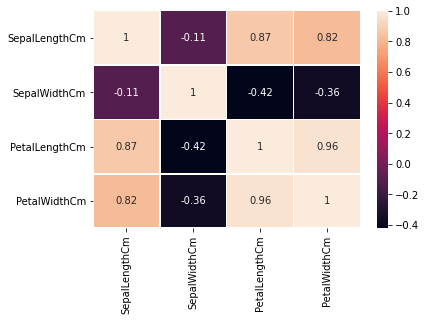

In [23]:
sns.heatmap(data.corr(),annot=True,linewidths=.5)

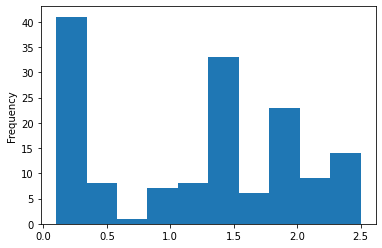

In [13]:
data['PetalWidthCm'].plot.hist()
plt.show()

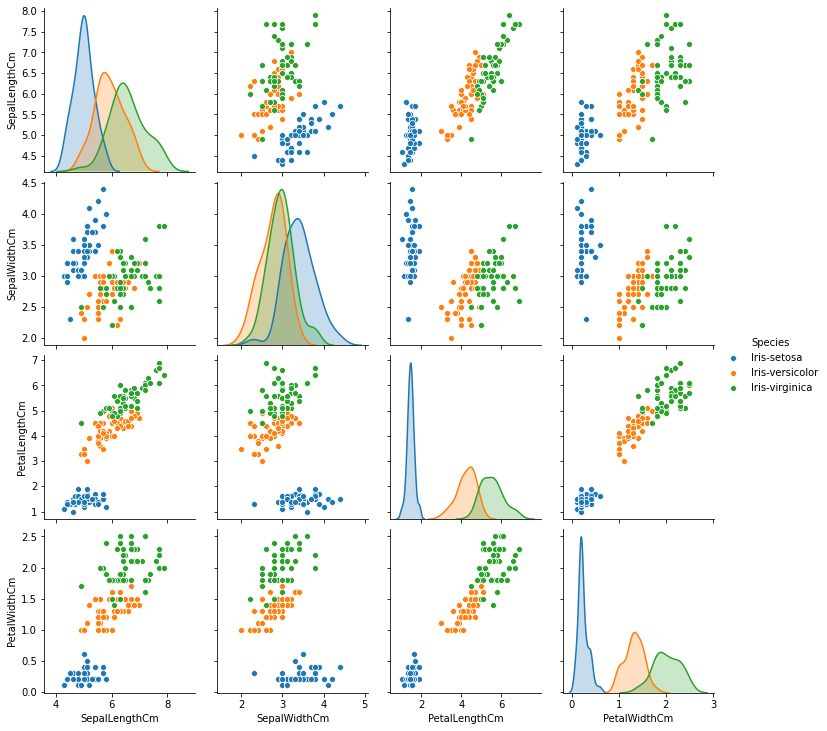

In [14]:
sns.pairplot(data, hue='Species')

In [15]:
y=data['Species']
X=data.drop(['Species'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y = pd.get_dummies(y)
y.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Decision Tree Algorithm

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image 

from pydot import graph_from_dot_data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

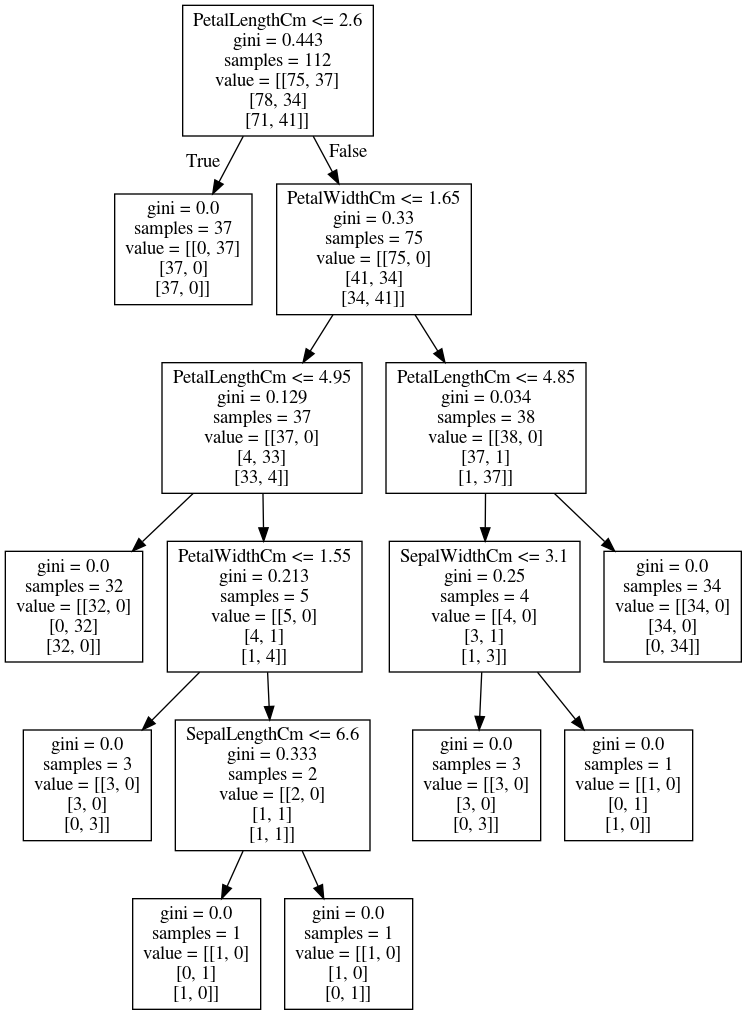

In [19]:
dot_data = StringIO()
features = data.columns
features = features[:-1]
export_graphviz(dt, out_file=dot_data,feature_names=features)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
y_pred = dt.predict(X_test)


In [21]:
# accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

In [22]:
# confusion matrix
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])